# BME-230B Spring 2019 HW 2 Question 1
James Casaletto, Andrew Davidson, Yuanqing Xue, Jim Zheng

Question 1.a, 1.b see [euclid_knn.py](euclid_knn.py)

ref: 
- [ Single-Cell Analysis in Python](https://scanpy.readthedocs.io/en/stable/api/index.html#tools-tl)
- [data exploration](exploreData.ipynb)
- [scanpy.tl.umap](https://icb-scanpy.readthedocs-hosted.com/en/stable/api/scanpy.tl.umap.html)
- <span style="color:red">scanpy.api.pl no longer exists</span>
- [scanpy.pl.umap](https://icb-scanpy.readthedocs-hosted.com/en/stable/api/scanpy.pl.umap.html#scanpy.pl.umap)


In [1]:
from euclid_knn import KnnG
import matplotlib.pyplot as plt
import numpy as np
import scanpy.api as sc
import scanpy

In [2]:
anndata = sc.read("PBMC.merged.h5ad")

In [3]:
anndata.obs.head()

,Sample,n_counts,n_genes,batch,louvain,anno,Method,Cell type
index,,,,,,,,
data_3p-AAACCTGAGCATCATC-0,data_3p,2394.0,871,0,9,B cell,10X_3prime,B cell
data_3p-AAACCTGAGCTAGTGG-0,data_3p,4520.0,1316,0,5,CD4 T cell,10X_3prime,CD4 T cell
data_3p-AAACCTGCACATTAGC-0,data_3p,2788.0,898,0,1,CD4 T cell,10X_3prime,CD4 T cell
data_3p-AAACCTGCACTGTTAG-0,data_3p,4667.0,1526,0,0,Monocyte_CD14,10X_3prime,Monocyte_CD14
data_3p-AAACCTGCATAGTAAG-0,data_3p,4440.0,1495,0,0,Monocyte_CD14,10X_3prime,Monocyte_CD14


In [4]:
%%time
# run PCA, compute pairwise distance, k-nearest-neighbors 
# trick to replacing scanpy implementation with our own is to 
# update the anndata object with our intermediate values
# 
# we replace the scanpy version of PCA by updating
# .adata.obsm['X_pca'] = our PCA() output
#
# we replace the scanpy version of k-nearest-neighbors by updating
# self.adata.uns['neighbors']['connectivities'] = our knn() output
# self.adata.uns['neighbors']['distances'] = out knn() output

knng = KnnG(anndata, n_neighbors=12, runPCA=True, nPC=50)

emptying .uns...
CPU times: user 2min 20s, sys: 1.58 s, total: 2min 22s
Wall time: 2min 17s


In [5]:
%%time
sc.tl.umap(anndata)

CPU times: user 14.6 s, sys: 106 ms, total: 14.7 s
Wall time: 12.3 s


In [6]:
# umap() color argument can be any of the variable in adata.obs
print([key for key in anndata.obs.keys()])

['Sample', 'n_counts', 'n_genes', 'batch', 'louvain', 'anno', 'Method', 'Cell type']


### 1.c. [5 pts] Turn in a UMAP plot of your 12-NN graph calculated from the combined chemistry PBMC dataset colored by batch (the chemistry used)

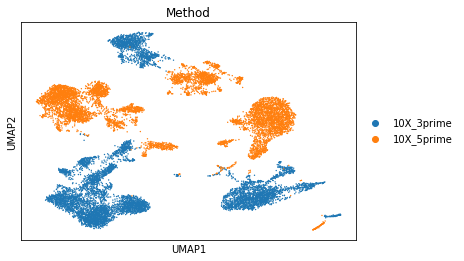

In [7]:
# color can be any thing in obs
scanpy.pl.umap(anndata, color=['Method'])

### 1.d. [5 pts] Turn in another UMAP plot of your 12-NN graph calculated from the combined chemistry PBMC dataset but colored by cell type

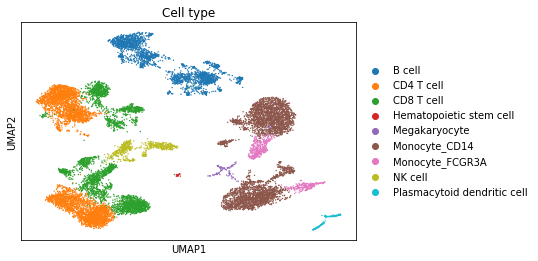

In [8]:
scanpy.pl.umap(anndata, color=['Cell type'])